In [5]:
import pandas as pd
df = pd.read_csv('estadisticas_ldu.csv')
df

,Fecha,LDU Quito,Oponente,Condición,Resultado,Posesión LDU,Posesión Oponente,xG LDU,xG Oponente,Disparos Totales LDU,...,Paradas Portero LDU,Paradas Portero Oponente,Goles Evitados LDU,Goles Evitados Oponente,Asistencias Esperadas LDU,Asistencias Esperadas Oponente,Saques de Banda LDU,Saques de Banda Oponente,Pases Totales LDU,Pases Totales Oponente
0,"Sun 16 Feb,\n12:45",LDU Quito,Vinotinto,Local,0 0,69%,31%,1.02,0.50,22.0,...,3.0,1.0,0.03,0.10,2.35,0.27,26.0,10.0,526.0,243.0
1,"Sat 22 Feb,\n19:00",LDU Quito,Ind. del Valle,Visitante,1 1,45%,55%,1.00,0.91,9.0,...,2.0,3.0,-0.01,0.16,0.75,0.95,23.0,15.0,312.0,373.0
2,"Sat 01 Mar,\n16:30",LDU Quito,Orense,Local,4 0,61%,39%,3.60,0.24,19.0,...,0.0,2.0,3.27,-4.00,1.36,0.17,16.0,4.0,462.0,292.0
3,"Sat 08 Mar,\n14:00",LDU Quito,Delfín,Local,3 0,59%,41%,1.48,0.69,11.0,...,4.0,3.0,1.38,-2.84,0.96,0.39,20.0,11.0,492.0,348.0
4,"Sun 16 Mar,\n18:00",LDU Quito,Emelec,Visitante,1 0,64%,36%,0.73,1.15,8.0,...,3.0,1.0,-0.96,1.04,0.74,0.62,20.0,19.0,457.0,246.0
5,"Sat 29 Mar,\n16:30",LDU Quito,Dep. Cuenca,Visitante,1 2,63%,37%,0.51,1.28,13.0,...,3.0,4.0,1.88,-1.19,0.64,0.11,22.0,19.0,495.0,294.0
6,"Mon 14 Apr,\n14:00",LDU Quito,Mushuc Runa,Visitante,1 0,66%,34%,0.52,0.98,10.0,...,3.0,1.0,-0.97,0.41,0.60,0.28,19.0,26.0,481.0,235.0
7,"Fri 18 Apr,\n16:30",LDU Quito,Aucas,Local,3 1,45%,55%,1.08,2.09,9.0,...,2.0,1.0,1.21,-2.50,0.45,1.53,9.0,14.0,358.0,430.0
8,"Sat 26 Apr,\n16:30",LDU Quito,Manta,Visitante,1 1,50%,51%,0.76,0.59,9.0,...,1.0,1.0,-0.91,-0.48,0.37,1.00,22.0,27.0,367.0,352.0
9,"Sat 03 May,\n14:00",LDU Quito,El Nacional,Local,2 2,65%,35%,1.19,1.99,20.0,...,3.0,1.0,-1.11,-0.30,1.14,0.80,21.0,18.0,384.0,219.0


In [7]:
df = df.drop(columns=['LDU Quito'])


In [9]:
df = df.drop([11,12,13,14])


In [11]:
df = df.drop([25])

In [13]:
df["Lugar"]=df["Condición"].astype("category").cat.codes

In [15]:
df["Oponente_Code"]=df["Oponente"].astype("category").cat.codes

In [17]:
# Convierte las columnas "Posesión LDU" y "Posesión Oponente" a float
df['Posesión LDU'] = df['Posesión LDU'].str.replace('%', '').astype(float) / 100
df['Posesión Oponente'] = df['Posesión Oponente'].str.replace('%', '').astype(float) / 100

In [19]:


def evaluar_resta_condicional(val, lugar):
    a, b = map(int, val.split())
    diferencia = a - b

    if diferencia > 0:
        return 0 if lugar == 0 else 1  # ganar = 0
    elif diferencia < 0:
        return 1 if lugar == 0 else 0  # perder = 1
    else:
        # empate = perde
        return 1
    

# Crear la nueva columna
df['Resultado_code'] = df.apply(lambda row: evaluar_resta_condicional(row['Resultado'], row['Lugar']), axis=1)

In [21]:

from datetime import datetime

# Ejemplo de DataFrame (omite esto si ya tienes uno)
# df = pd.DataFrame({'Fecha': ['Sat 22 Feb,\n19:00', 'Sun 16 Mar,\n08:30']})

# Función para limpiar y convertir a solo fecha (YYYY-MM-DD)
def formatear_fecha(fecha_str):
    fecha_str = fecha_str.replace('\n', ' ')
    fecha_dt = datetime.strptime('2025 ' + fecha_str, '%Y %a %d %b, %H:%M')
    return fecha_dt.strftime('%Y-%m-%d')  # solo fecha

# Aplica la función y sobrescribe la columna
df['Fecha'] = df['Fecha'].apply(formatear_fecha)



In [23]:
df

,Fecha,Oponente,Condición,Resultado,Posesión LDU,Posesión Oponente,xG LDU,xG Oponente,Disparos Totales LDU,Disparos Totales Oponente,...,Goles Evitados Oponente,Asistencias Esperadas LDU,Asistencias Esperadas Oponente,Saques de Banda LDU,Saques de Banda Oponente,Pases Totales LDU,Pases Totales Oponente,Lugar,Oponente_Code,Resultado_code
0,2025-02-16,Vinotinto,Local,0 0,0.69,0.31,1.02,0.50,22.0,10.0,...,0.10,2.35,0.27,26.0,10.0,526.0,243.0,0,13,1
1,2025-02-22,Ind. del Valle,Visitante,1 1,0.45,0.55,1.00,0.91,9.0,13.0,...,0.16,0.75,0.95,23.0,15.0,312.0,373.0,1,6,1
2,2025-03-01,Orense,Local,4 0,0.61,0.39,3.60,0.24,19.0,7.0,...,-4.00,1.36,0.17,16.0,4.0,462.0,292.0,0,10,0
3,2025-03-08,Delfín,Local,3 0,0.59,0.41,1.48,0.69,11.0,7.0,...,-2.84,0.96,0.39,20.0,11.0,492.0,348.0,0,2,0
4,2025-03-16,Emelec,Visitante,1 0,0.64,0.36,0.73,1.15,8.0,15.0,...,1.04,0.74,0.62,20.0,19.0,457.0,246.0,1,5,1
5,2025-03-29,Dep. Cuenca,Visitante,1 2,0.63,0.37,0.51,1.28,13.0,7.0,...,-1.19,0.64,0.11,22.0,19.0,495.0,294.0,1,3,0
6,2025-04-14,Mushuc Runa,Visitante,1 0,0.66,0.34,0.52,0.98,10.0,14.0,...,0.41,0.60,0.28,19.0,26.0,481.0,235.0,1,9,1
7,2025-04-18,Aucas,Local,3 1,0.45,0.55,1.08,2.09,9.0,18.0,...,-2.50,0.45,1.53,9.0,14.0,358.0,430.0,0,0,0
8,2025-04-26,Manta,Visitante,1 1,0.50,0.51,0.76,0.59,9.0,11.0,...,-0.48,0.37,1.00,22.0,27.0,367.0,352.0,1,8,1
9,2025-05-03,El Nacional,Local,2 2,0.65,0.35,1.19,1.99,20.0,13.0,...,-0.30,1.14,0.80,21.0,18.0,384.0,219.0,0,4,1


In [ ]:
df

In [25]:

def separar_goles(df, columna_resultado='Resultado', col_local='GolesLDU', col_oponente='Goles_Oponente'):
    # Divide la columna Resultado en dos columnas numéricas
    df[[col_local, col_oponente]] = df[columna_resultado].str.split(' ', expand=True).astype(int)
    return df

In [27]:
def separar_goles_condicional(df, 
                              columna_resultado='Resultado', 
                              columna_lugar='Lugar', 
                              col_local='Goles', 
                              col_oponente='Goles_Oponente'):
    # Primero separar los goles
    goles = df[columna_resultado].str.split(' ', expand=True).astype(int)
    
    # Inicializa las nuevas columnas con valores de goles
    df[col_local] = goles[0]
    df[col_oponente] = goles[1]
    
    # Intercambia cuando Lugar == 1
    mask = df[columna_lugar] == 1
    df.loc[mask, [col_local, col_oponente]] = df.loc[mask, [col_oponente, col_local]].values
    
    return df



df = separar_goles_condicional(df)


In [44]:
df

,Fecha,Oponente,Condición,Resultado,Posesión LDU,Posesión Oponente,xG LDU,xG Oponente,Disparos Totales LDU,Disparos Totales Oponente,...,Asistencias Esperadas Oponente,Saques de Banda LDU,Saques de Banda Oponente,Pases Totales LDU,Pases Totales Oponente,Lugar,Oponente_Code,Resultado_code,Goles,Goles_Oponente
0,2025-02-16,Vinotinto,Local,0 0,0.69,0.31,1.02,0.50,22.0,10.0,...,0.27,26.0,10.0,526.0,243.0,0,13,1,0,0
1,2025-02-22,Ind. del Valle,Visitante,1 1,0.45,0.55,1.00,0.91,9.0,13.0,...,0.95,23.0,15.0,312.0,373.0,1,6,1,1,1
2,2025-03-01,Orense,Local,4 0,0.61,0.39,3.60,0.24,19.0,7.0,...,0.17,16.0,4.0,462.0,292.0,0,10,0,4,0
3,2025-03-08,Delfín,Local,3 0,0.59,0.41,1.48,0.69,11.0,7.0,...,0.39,20.0,11.0,492.0,348.0,0,2,0,3,0
4,2025-03-16,Emelec,Visitante,1 0,0.64,0.36,0.73,1.15,8.0,15.0,...,0.62,20.0,19.0,457.0,246.0,1,5,1,0,1
5,2025-03-29,Dep. Cuenca,Visitante,1 2,0.63,0.37,0.51,1.28,13.0,7.0,...,0.11,22.0,19.0,495.0,294.0,1,3,0,2,1
6,2025-04-14,Mushuc Runa,Visitante,1 0,0.66,0.34,0.52,0.98,10.0,14.0,...,0.28,19.0,26.0,481.0,235.0,1,9,1,0,1
7,2025-04-18,Aucas,Local,3 1,0.45,0.55,1.08,2.09,9.0,18.0,...,1.53,9.0,14.0,358.0,430.0,0,0,0,3,1
8,2025-04-26,Manta,Visitante,1 1,0.50,0.51,0.76,0.59,9.0,11.0,...,1.00,22.0,27.0,367.0,352.0,1,8,1,1,1
9,2025-05-03,El Nacional,Local,2 2,0.65,0.35,1.19,1.99,20.0,13.0,...,0.80,21.0,18.0,384.0,219.0,0,4,1,2,2


In [46]:
nuevo_df = df.drop(columns=['Condición', 'Oponente','Posesión Oponente','Resultado'])

In [50]:
nuevo_df

,Fecha,Posesión LDU,xG LDU,xG Oponente,Disparos Totales LDU,Disparos Totales Oponente,Disparos a Puerta LDU,Disparos a Puerta Oponente,Disparos al Poste LDU,Disparos al Poste Oponente,...,Asistencias Esperadas Oponente,Saques de Banda LDU,Saques de Banda Oponente,Pases Totales LDU,Pases Totales Oponente,Lugar,Oponente_Code,Resultado_code,Goles,Goles_Oponente
0,2025-02-16,0.69,1.02,0.50,22.0,10.0,1.0,1.0,1.0,1.0,...,0.27,26.0,10.0,526.0,243.0,0,13,1,0,0
1,2025-02-22,0.45,1.00,0.91,9.0,13.0,3.0,3.0,NaN,NaN,...,0.95,23.0,15.0,312.0,373.0,1,6,1,1,1
2,2025-03-01,0.61,3.60,0.24,19.0,7.0,7.0,7.0,1.0,1.0,...,0.17,16.0,4.0,462.0,292.0,0,10,0,4,0
3,2025-03-08,0.59,1.48,0.69,11.0,7.0,6.0,6.0,0.0,0.0,...,0.39,20.0,11.0,492.0,348.0,0,2,0,3,0
4,2025-03-16,0.64,0.73,1.15,8.0,15.0,4.0,4.0,NaN,NaN,...,0.62,20.0,19.0,457.0,246.0,1,5,1,0,1
5,2025-03-29,0.63,0.51,1.28,13.0,7.0,4.0,4.0,NaN,NaN,...,0.11,22.0,19.0,495.0,294.0,1,3,0,2,1
6,2025-04-14,0.66,0.52,0.98,10.0,14.0,4.0,4.0,NaN,NaN,...,0.28,19.0,26.0,481.0,235.0,1,9,1,0,1
7,2025-04-18,0.45,1.08,2.09,9.0,18.0,5.0,5.0,0.0,0.0,...,1.53,9.0,14.0,358.0,430.0,0,0,0,3,1
8,2025-04-26,0.50,0.76,0.59,9.0,11.0,2.0,2.0,NaN,NaN,...,1.00,22.0,27.0,367.0,352.0,1,8,1,1,1
9,2025-05-03,0.65,1.19,1.99,20.0,13.0,3.0,3.0,NaN,NaN,...,0.80,21.0,18.0,384.0,219.0,0,4,1,2,2


In [ ]:
nuevo_df.info()

In [52]:
nuevo_df = nuevo_df.rename(columns={'Goles_Oponente': 'Goles_Contra'})
nuevo_df = nuevo_df.rename(columns={'Goles': 'Goles_Favor'})

In [54]:
nuevo_df

,Fecha,Posesión LDU,xG LDU,xG Oponente,Disparos Totales LDU,Disparos Totales Oponente,Disparos a Puerta LDU,Disparos a Puerta Oponente,Disparos al Poste LDU,Disparos al Poste Oponente,...,Asistencias Esperadas Oponente,Saques de Banda LDU,Saques de Banda Oponente,Pases Totales LDU,Pases Totales Oponente,Lugar,Oponente_Code,Resultado_code,Goles_Favor,Goles_Contra
0,2025-02-16,0.69,1.02,0.50,22.0,10.0,1.0,1.0,1.0,1.0,...,0.27,26.0,10.0,526.0,243.0,0,13,1,0,0
1,2025-02-22,0.45,1.00,0.91,9.0,13.0,3.0,3.0,NaN,NaN,...,0.95,23.0,15.0,312.0,373.0,1,6,1,1,1
2,2025-03-01,0.61,3.60,0.24,19.0,7.0,7.0,7.0,1.0,1.0,...,0.17,16.0,4.0,462.0,292.0,0,10,0,4,0
3,2025-03-08,0.59,1.48,0.69,11.0,7.0,6.0,6.0,0.0,0.0,...,0.39,20.0,11.0,492.0,348.0,0,2,0,3,0
4,2025-03-16,0.64,0.73,1.15,8.0,15.0,4.0,4.0,NaN,NaN,...,0.62,20.0,19.0,457.0,246.0,1,5,1,0,1
5,2025-03-29,0.63,0.51,1.28,13.0,7.0,4.0,4.0,NaN,NaN,...,0.11,22.0,19.0,495.0,294.0,1,3,0,2,1
6,2025-04-14,0.66,0.52,0.98,10.0,14.0,4.0,4.0,NaN,NaN,...,0.28,19.0,26.0,481.0,235.0,1,9,1,0,1
7,2025-04-18,0.45,1.08,2.09,9.0,18.0,5.0,5.0,0.0,0.0,...,1.53,9.0,14.0,358.0,430.0,0,0,0,3,1
8,2025-04-26,0.50,0.76,0.59,9.0,11.0,2.0,2.0,NaN,NaN,...,1.00,22.0,27.0,367.0,352.0,1,8,1,1,1
9,2025-05-03,0.65,1.19,1.99,20.0,13.0,3.0,3.0,NaN,NaN,...,0.80,21.0,18.0,384.0,219.0,0,4,1,2,2


In [56]:
nuevo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 0 to 24
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Fecha                           21 non-null     object 
 1   Posesión LDU                    21 non-null     float64
 2   xG LDU                          21 non-null     float64
 3   xG Oponente                     21 non-null     float64
 4   Disparos Totales LDU            21 non-null     float64
 5   Disparos Totales Oponente       21 non-null     float64
 6   Disparos a Puerta LDU           21 non-null     float64
 7   Disparos a Puerta Oponente      21 non-null     float64
 8   Disparos al Poste LDU           9 non-null      float64
 9   Disparos al Poste Oponente      9 non-null      float64
 10  Disparos Bloqueados LDU         21 non-null     float64
 11  Disparos Bloqueados Oponente    21 non-null     float64
 12  Tiros Libres LDU                21 non-null

In [58]:
nuevo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 0 to 24
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Fecha                           21 non-null     object 
 1   Posesión LDU                    21 non-null     float64
 2   xG LDU                          21 non-null     float64
 3   xG Oponente                     21 non-null     float64
 4   Disparos Totales LDU            21 non-null     float64
 5   Disparos Totales Oponente       21 non-null     float64
 6   Disparos a Puerta LDU           21 non-null     float64
 7   Disparos a Puerta Oponente      21 non-null     float64
 8   Disparos al Poste LDU           9 non-null      float64
 9   Disparos al Poste Oponente      9 non-null      float64
 10  Disparos Bloqueados LDU         21 non-null     float64
 11  Disparos Bloqueados Oponente    21 non-null     float64
 12  Tiros Libres LDU                21 non-null

In [60]:
nuevo_df

,Fecha,Posesión LDU,xG LDU,xG Oponente,Disparos Totales LDU,Disparos Totales Oponente,Disparos a Puerta LDU,Disparos a Puerta Oponente,Disparos al Poste LDU,Disparos al Poste Oponente,...,Asistencias Esperadas Oponente,Saques de Banda LDU,Saques de Banda Oponente,Pases Totales LDU,Pases Totales Oponente,Lugar,Oponente_Code,Resultado_code,Goles_Favor,Goles_Contra
0,2025-02-16,0.69,1.02,0.50,22.0,10.0,1.0,1.0,1.0,1.0,...,0.27,26.0,10.0,526.0,243.0,0,13,1,0,0
1,2025-02-22,0.45,1.00,0.91,9.0,13.0,3.0,3.0,NaN,NaN,...,0.95,23.0,15.0,312.0,373.0,1,6,1,1,1
2,2025-03-01,0.61,3.60,0.24,19.0,7.0,7.0,7.0,1.0,1.0,...,0.17,16.0,4.0,462.0,292.0,0,10,0,4,0
3,2025-03-08,0.59,1.48,0.69,11.0,7.0,6.0,6.0,0.0,0.0,...,0.39,20.0,11.0,492.0,348.0,0,2,0,3,0
4,2025-03-16,0.64,0.73,1.15,8.0,15.0,4.0,4.0,NaN,NaN,...,0.62,20.0,19.0,457.0,246.0,1,5,1,0,1
5,2025-03-29,0.63,0.51,1.28,13.0,7.0,4.0,4.0,NaN,NaN,...,0.11,22.0,19.0,495.0,294.0,1,3,0,2,1
6,2025-04-14,0.66,0.52,0.98,10.0,14.0,4.0,4.0,NaN,NaN,...,0.28,19.0,26.0,481.0,235.0,1,9,1,0,1
7,2025-04-18,0.45,1.08,2.09,9.0,18.0,5.0,5.0,0.0,0.0,...,1.53,9.0,14.0,358.0,430.0,0,0,0,3,1
8,2025-04-26,0.50,0.76,0.59,9.0,11.0,2.0,2.0,NaN,NaN,...,1.00,22.0,27.0,367.0,352.0,1,8,1,1,1
9,2025-05-03,0.65,1.19,1.99,20.0,13.0,3.0,3.0,NaN,NaN,...,0.80,21.0,18.0,384.0,219.0,0,4,1,2,2


[0]	validation_0-logloss:0.69430
[1]	validation_0-logloss:0.70682
[2]	validation_0-logloss:0.70287
[3]	validation_0-logloss:0.71615
[4]	validation_0-logloss:0.71418
[5]	validation_0-logloss:0.72779
[6]	validation_0-logloss:0.74147
[7]	validation_0-logloss:0.75511
[8]	validation_0-logloss:0.74965
[9]	validation_0-logloss:0.76309
[10]	validation_0-logloss:0.75863

--- Métricas ---
Accuracy: 0.6
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.50      0.50      0.50         2

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5

Matriz de Confusión:
 [[2 1]
 [1 1]]


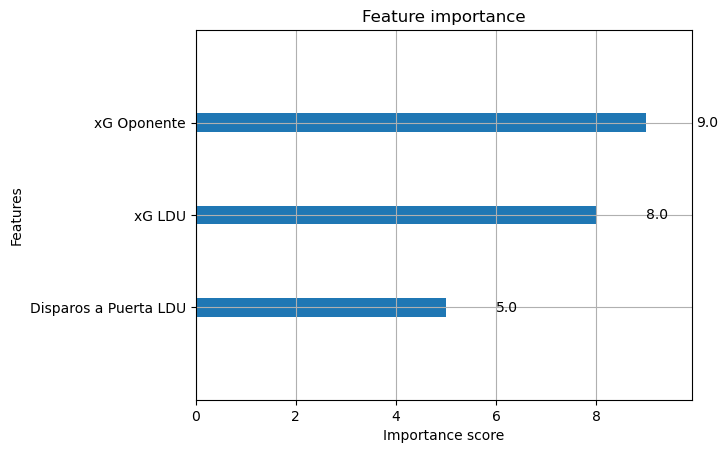

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Cargar datos
df=nuevo_df
# 1. Preprocesamiento
# --- Tratar NaNs (ej: Disparos al Poste -> rellenar con 0)
df.fillna(0, inplace=True)

# --- Feature Engineering: Diferencias/Ratios clave
df["Diferencia_xG"] = df["xG LDU"] - df["xG Oponente"]
df["Ratio_Disparos_Puerta"] = df["Disparos a Puerta LDU"] / (df["Disparos a Puerta Oponente"] + 1e-6)  # Evitar división por 0
df["Eficacia_Porteria"] = df["Paradas Portero LDU"] / (df["Disparos a Puerta Oponente"] + 1e-6)

# --- Selección de Features (ejemplo)
features = [
    "Posesión LDU", "xG LDU", "xG Oponente", "Diferencia_xG",
    "Disparos a Puerta LDU", "Disparos a Puerta Oponente",
    "Ratio_Disparos_Puerta", "Eficacia_Porteria",
    "Córners LDU", "Córners Oponente", "Lugar", "Oponente_Code"
]

X = df[features]
y = df["Resultado_code"]  # 0=Victoria, 1=Derrota

# 2. Train-Test Split (Temporal! No mezclar)
test_size = 0.2  # 20% para test (ej: últimos 4-5 partidos)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

# 3. Modelo XGBoost
model = xgb.XGBClassifier(
    objective="binary:logistic",  # Clasificación binaria
    n_estimators=150,
    max_depth=3,  # Profundidad reducida para evitar overfitting
    learning_rate=0.1,
    reg_alpha=0.5,  # Regularización L1
    reg_lambda=0.5,  # Regularización L2
    early_stopping_rounds=10,
    eval_metric="logloss"
)

# Entrenar con early stopping
model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=True
)

# 4. Evaluación
y_pred = model.predict(X_test)
print("\n--- Métricas ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))

# 5. Importancia de Features
xgb.plot_importance(model, max_num_features=10)
plt.show()

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

df=nuevo_df
df.fillna(0, inplace=True)

# Crear nuevas variables clave
df["Diferencia_xG"] = df["xG LDU"] - df["xG Oponente"]
df["Ratio_Disparos_Puerta"] = df["Disparos a Puerta LDU"] / (df["Disparos a Puerta Oponente"] + 1e-6)
df["Eficacia_Porteria"] = df["Paradas Portero LDU"] / (df["Disparos a Puerta Oponente"] + 1e-6)
df["Diferencia_Posesion"] = df["Posesión LDU"] - (100 - df["Posesión LDU"])  # Asumiendo que "Posesión Oponente" es 100 - Posesión LDU

# Selección de features
features = [
    "Posesión LDU", "xG LDU", "xG Oponente", "Diferencia_xG",
    "Disparos a Puerta LDU", "Disparos a Puerta Oponente",
    "Ratio_Disparos_Puerta", "Eficacia_Porteria",
    "Córners LDU", "Córners Oponente", "Diferencia_Posesion",
    "Goles_Favor", "Goles_Contra"
]

X = df[features]
y = df["Resultado_code"]  # 0=Victoria, 1=Derrota

# Train-Test Split (Temporal)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Configurar Random Forest (ajustado para evitar overfitting)
model = RandomForestClassifier(
    n_estimators=100,  # Número de árboles
    max_depth=3,       # Profundidad máxima (para datasets pequeños)
    min_samples_split=5,  # Mínimo de muestras para dividir un nodo
    class_weight="balanced",  # Balanceo automático de clases
    random_state=42
)

# Entrenar
model.fit(X_train, y_train)

# Predecir
y_pred = model.predict(X_test)

# Métricas
print("--- Random Forest ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))

# Importancia de Features
importances = pd.DataFrame({
    "Feature": features,
    "Importance": model.feature_importances_
}).sort_values("Importance", ascending=False)
print("\nImportancia de Features:\n", importances)

--- Random Forest ---
Accuracy: 0.6

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.50      0.50      0.50         2

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5

Matriz de Confusión:
 [[2 1]
 [1 1]]

Importancia de Features:
                        Feature  Importance
11                 Goles_Favor    0.152440
1                       xG LDU    0.132189
4        Disparos a Puerta LDU    0.106331
9             Córners Oponente    0.095715
5   Disparos a Puerta Oponente    0.090473
3                Diferencia_xG    0.082304
2                  xG Oponente    0.070431
7            Eficacia_Porteria    0.062218
10         Diferencia_Posesion    0.060012
8                  Córners LDU    0.057394
0                 Posesión LDU    0.056221
12                Goles_Contra  

--- Random Forest ---
Accuracy: 0.6

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.50      0.50      0.50         2

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5

Matriz de Confusión:
 [[2 1]
 [1 1]]

Importancia de Features:
                        Feature  Importance
11                 Goles_Favor    0.152440
1                       xG LDU    0.132189
4        Disparos a Puerta LDU    0.106331
9             Córners Oponente    0.095715
5   Disparos a Puerta Oponente    0.090473
3                Diferencia_xG    0.082304
2                  xG Oponente    0.070431
7            Eficacia_Porteria    0.062218
10         Diferencia_Posesion    0.060012
8                  Córners LDU    0.057394
0                 Posesión LDU    0.056221
12                Goles_Contra  

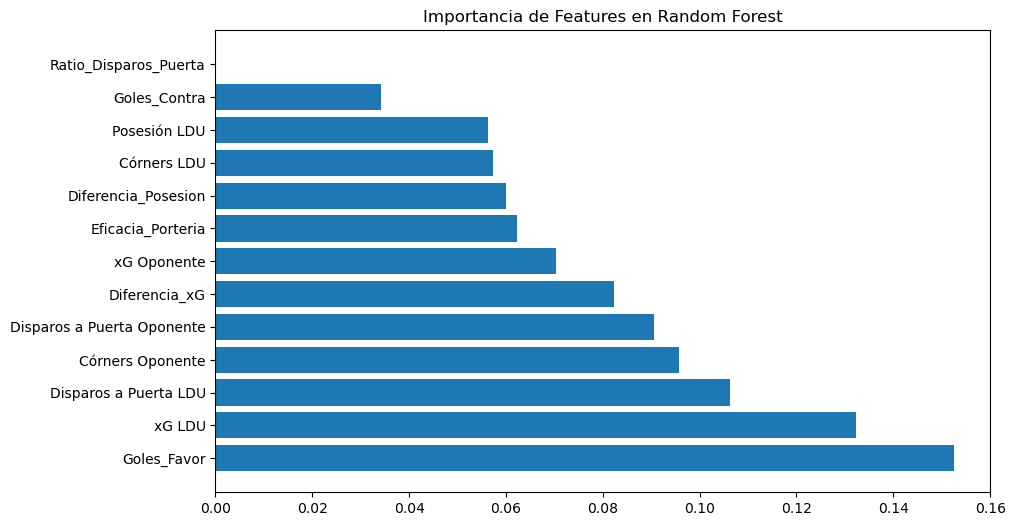

In [76]:
# Configurar Random Forest (ajustado para evitar overfitting)
model = RandomForestClassifier(
    n_estimators=100,  # Número de árboles
    max_depth=3,       # Profundidad máxima (para datasets pequeños)
    min_samples_split=5,  # Mínimo de muestras para dividir un nodo
    class_weight="balanced",  # Balanceo automático de clases
    random_state=42
)

# Entrenar
model.fit(X_train, y_train)

# Predecir
y_pred = model.predict(X_test)
# Métricas
print("--- Random Forest ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))

# Importancia de Features
importances = pd.DataFrame({
    "Feature": features,
    "Importance": model.feature_importances_
}).sort_values("Importance", ascending=False)
print("\nImportancia de Features:\n", importances)
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [2, 3, 4],
    "min_samples_split": [2, 5]
}

grid_search = GridSearchCV(
    RandomForestClassifier(class_weight="balanced", random_state=42),
    param_grid,
    cv=3,
    scoring="f1"  # Priorizar F1-Score
)
grid_search.fit(X_train, y_train)

# Mejor modelo
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("\nMejores Hiperparámetros:", grid_search.best_params_)
print("F1-Score (mejor modelo):", f1_score(y_test, y_pred_best))
import matplotlib.pyplot as plt

# Gráfico de Importancia de Features
plt.figure(figsize=(10, 6))
plt.barh(importances["Feature"], importances["Importance"])
plt.title("Importancia de Features en Random Forest")
plt.show()